In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [45]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'])
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [46]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

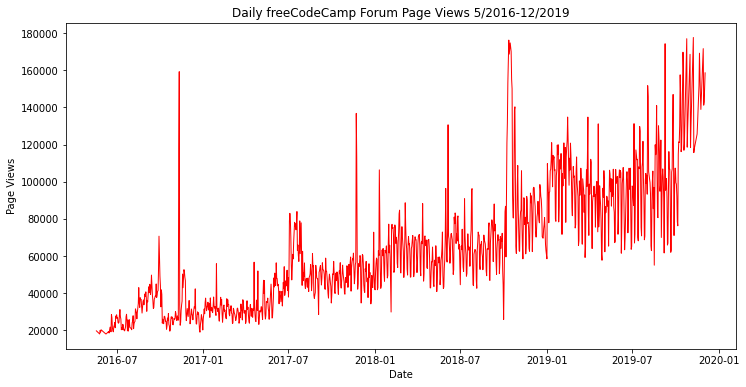

In [47]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(df['date'],df['value'],'r',linewidth=1)
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")


In [48]:
df_bar = df.copy()
df_bar['month'] = df['date'].dt.month
df_bar['year'] = df['date'].dt.year
df_bar

,date,value,month,year
10,2016-05-19,19736,5,2016
17,2016-05-26,18060,5,2016
18,2016-05-27,19997,5,2016
19,2016-05-28,19044,5,2016
20,2016-05-29,20325,5,2016
...,...,...,...,...
1294,2019-11-24,138875,11,2019
1299,2019-11-29,171584,11,2019
1300,2019-11-30,141161,11,2019
1301,2019-12-01,142918,12,2019


In [49]:
df_bar=df_bar.groupby(['year','month'])['value'].mean()
df_bar=df_bar.unstack()
df_bar.columns =['January','February','March','April','May','June','July','August','September','October','November','December']
df_bar

,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


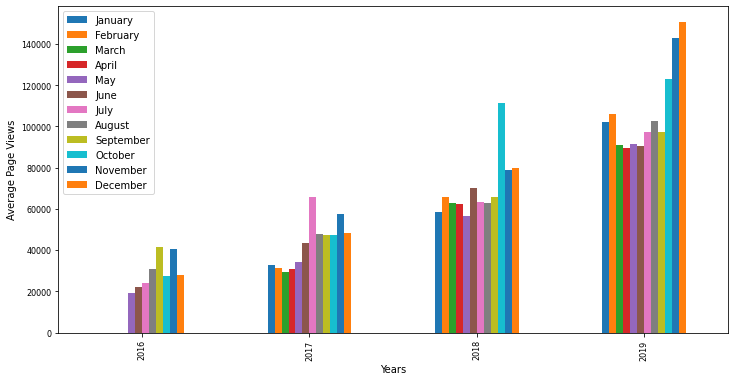

In [50]:
fig=df_bar.plot(kind='bar',figsize=(12,6),xlabel='Years',ylabel='Average Page Views',fontsize=8).figure

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

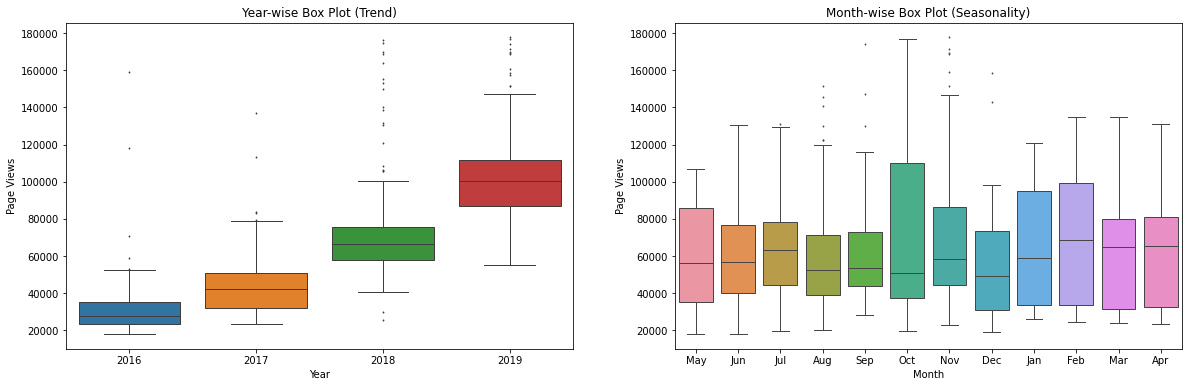

In [51]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
sns.boxplot(x='year',y='value',data=df_box,ax=axs[0],fliersize=1,linewidth=1).set(xlabel='Year',ylabel='Page Views',title='Year-wise Box Plot (Trend)')
sns.boxplot(x="month", y="value", data=df_box,ax=axs[1],fliersize=1,linewidth=1).set(xlabel='Month',ylabel='Page Views',title='Month-wise Box Plot (Seasonality)')